In [1]:
include("../../src/Finite_Vol/pnjl_FV.jl")
using Plots 
using LaTeXStrings
using DataFrames, CSV
using QuadGK, LinearAlgebra


In [30]:
Rs = 50:-0.1:1
Lambda_tes1 = 1.8 ./ Rs
Lambda_tes2 = 1 ./ (sqrt(2).* Rs)
Lambda_I1 = similar(Rs)
Lambda_I2 = similar(Rs)
for (i, R) in enumerate(Rs)
    V = (4/3)*pi*R^3
    c = R
    ab = (3*V)/(4*pi) / c  
    e = 0.0
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2)) 
    Lambda_I1[i] = Find_IR_el(a, b, c)
    Lambda_I2[i] = Find_IR_el(a, b, c,modes="N")
end




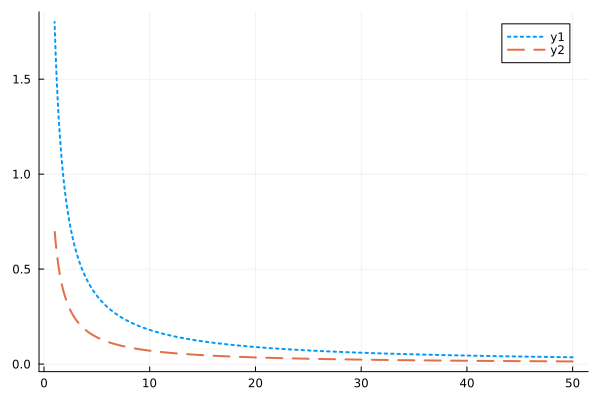

In [31]:
plot(Rs, Lambda_I1, lw=2, linestyle=:dot)
plot!(Rs, Lambda_I2, lw=2, linestyle=:dash)

In [23]:
es = 0.0:0.01:0.99
Lambda_J1 = similar(es)
Lambda_J2 = similar(es)
for (i, e) in enumerate(es)
    R = 7.0
    V = (4/3)*pi*R^3
    c = R
    ab = (3*V)/(4*pi) / c  
    #e = 0.0
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2)) 
    Lambda_J1[i] = Find_IR_el(a, b, c)
    Lambda_J2[i] = Find_IR_el(a, b, c;modes="N")
   # println("e=$(e), Lambda_I=$(Lambda_I2[i])")
end


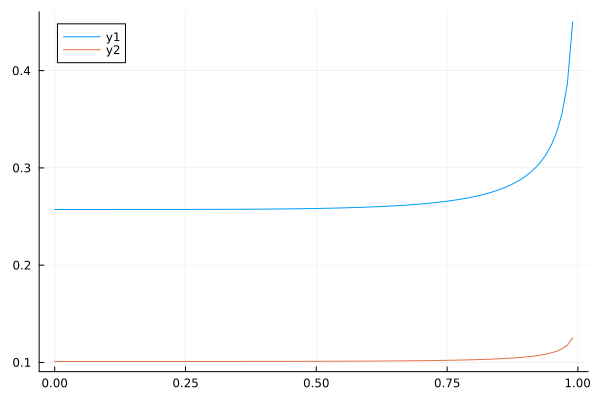

In [24]:
plot(es, Lambda_J1)
plot!(es, Lambda_J2)

In [17]:
# 计算不同离心率下的表面积（使用近似公式）
function surface_area_ellipsoid(a, b, c)
    # Knud Thomsen 近似公式
    p = 1.6075
    return 4π * ((a^p * b^p + a^p * c^p + b^p * c^p)/3)^(1/p)
end




surface_area_ellipsoid (generic function with 1 method)

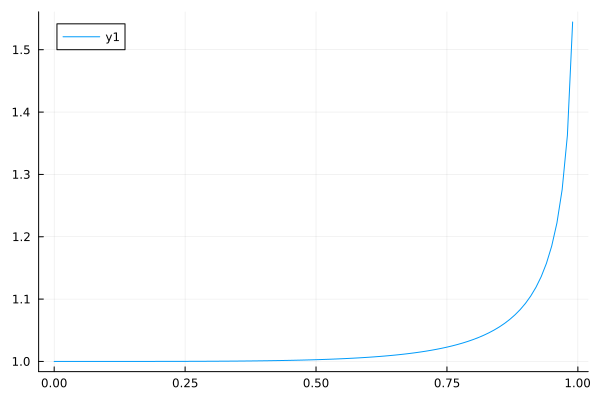

In [37]:
# 示例：R=20, V固定
R = 20.0
V = (4/3)*pi*R^3
c = R
ab = (3*V)/(4*pi) / c

es = 0.0:0.01:0.99
S_values = similar(es)

for (i, e) in enumerate(es)
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2))
    S_values[i] = surface_area_ellipsoid(a, b, c) / (4*pi * R^2)
end
plot(es, S_values)

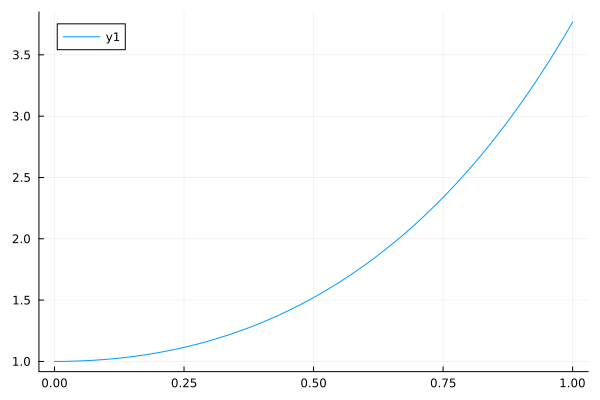

In [53]:
# 使用示例
R = 20.0
scale_factors = 0.0:0.01:1.00
S_vv = similar(scale_factors)
for (i, s) in enumerate(scale_factors)
    a, b, c = parametrize_by_shape(R, s)
    S_vv[i] = surface_area_ellipsoid(a, b, c) / (4π * R^2)
end
plot(scale_factors, S_vv)

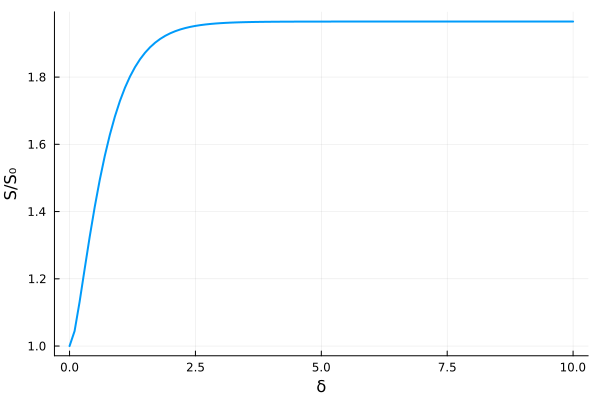

In [54]:
# 测试
R = 10.0
δ_values = 0.0:0.1:10.0
S_values = similar(δ_values)

for (i, δ) in enumerate(δ_values)
    a, b, c = parametrize_deformation(R, δ;para=3.0)
    S_values[i] = surface_area_ellipsoid(a, b, c) / (4π*R^2)
end

plot(δ_values, S_values, xlabel="δ", ylabel="S/S₀", lw=2, label="")

In [15]:
function parametrize_deformation(R, δ;para=2.0,scale=1.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    para: 调节变形幅度的参数
    scale: +1 压扁 -1 拉长
    - δ = 0: 球形 (a=b=c=R)
    - δ > 0 (且 scale=1.0): 扁平椭球(a=b > c)
    - δ > 0 (且 scale=-1.0): 拉长椭球(a=b < c)
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(scale * 2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end


parametrize_deformation (generic function with 1 method)

In [19]:
# 使用示例
R = 30.0
S0 = 4π * R^2
deltas = 0.0:0.01:1.0
S_vv = similar(deltas)
for (i, δ) in enumerate(deltas)
    a, b, c = parametrize_deformation(R, δ;para=3.0, scale=-1.0)
    S_vv[i] = surface_area_ellipsoid(a, b, c) /S0
end
plot(deltas, S_vv, xlabel=L"\delta_N", ylabel=L"S/S_0", 
     lw=2, label="", 
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("SurfaceArea.svg")

"d:\\CodeFile\\Julia\\PNJLs\\Test\\FV\\SurfaceArea.svg"

In [20]:
delta_s = 0.0:0.01:1.0
LambdaIR = similar(delta_s)
for (i, δ) in enumerate(delta_s)
    R = 30.0
    a, b, c = parametrize_deformation(R, δ;para=3.0, scale=-1.0)
    LambdaIR[i] = Find_IR_el(a, b, c,modes="D")
end

a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
a,b,c=29.414629738321167,29.414629738321167,31.205920097700748
 IR=0.06008414450261505
a,b,c=28.85711184229789,28.85711184229789,32.42336152952931
 IR=0.06023462272235139
a,b,c=28.32548960970575,28.32548960970575,33.651847587594624
 IR=0.06046920773800052
a,b,c=27.817991753797113,27.817991753797113,34.89090353312207
 IR=0.06077647305860081
a,b,c=27.33301053196689,27.33301053196689,36.140056464520484
 IR=0.06114642476502729
a,b,c=26.869082932160776,26.869082932160776,37.39883523569722
 IR=0.0615703414963489
a,b,c=26.424874426045502,26.424874426045502,38.66677041861307
 IR=0.06204062484766182
a,b,c=25.999164886510112,25.999164886510112,39.9433943048055
 IR=0.0625506617989555
a,b,c=25.59083633797561,25.59083633797561,41.228240941230034
 IR=0.06309470003807767
a,b,c=25.19886226509049,25.19886226509049,42.520846196294244
 IR=0.063667736356621
a,b,c=24.8222982516147,24.8222982516147,43.82074785240631
 IR=0.0642654177614946
a,b,c=24.46027375890557,

In [21]:
plot(delta_s, LambdaIR, xlabel=L"\delta_D", ylabel=L"\Lambda_{\rm IR}", 
     lw=2, label="", 
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("LambdaIR_D.svg")

"d:\\CodeFile\\Julia\\PNJLs\\Test\\FV\\LambdaIR_D.svg"

In [22]:
delta_s2 = 0.0:0.01:1.0
LambdaIR2 = similar(delta_s2)
for (i, δ) in enumerate(delta_s2)
    R = 30.0
    a, b, c = parametrize_deformation(R, δ;para=3.0, scale=-1.0)
    LambdaIR2[i] = Find_IR_el(a, b, c,modes="N")
end

a,b,c=30.0,30.0,30.0
 IR=0.023580803749250822
a,b,c=29.414629738321167,29.414629738321167,31.205920097700748
 IR=0.02358819668068292
a,b,c=28.85711184229789,28.85711184229789,32.42336152952931
 IR=0.023609776982575072
a,b,c=28.32548960970575,28.32548960970575,33.651847587594624
 IR=0.02364467601094038
a,b,c=27.817991753797113,27.817991753797113,34.89090353312207
 IR=0.023692062634352612
a,b,c=27.33301053196689,27.33301053196689,36.140056464520484
 IR=0.023751141904138344
a,b,c=26.869082932160776,26.869082932160776,37.39883523569722
 IR=0.02382115395425794
a,b,c=26.424874426045502,26.424874426045502,38.66677041861307
 IR=0.02390137304472316
a,b,c=25.999164886510112,25.999164886510112,39.9433943048055
 IR=0.023991106684928383
a,b,c=25.59083633797561,25.59083633797561,41.228240941230034
 IR=0.024089694791469593
a,b,c=25.19886226509049,25.19886226509049,42.520846196294244
 IR=0.02419650885017602
a,b,c=24.8222982516147,24.8222982516147,43.82074785240631
 IR=0.024310951062073476
a,b,c=24.460

In [23]:
plot(delta_s2, LambdaIR2, xlabel=L"\delta_N", ylabel=L"\Lambda_{\rm IR}", 
     lw=2, label="", 
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("LambdaIR_N.svg")

"d:\\CodeFile\\Julia\\PNJLs\\Test\\FV\\LambdaIR_N.svg"

In [24]:
using CSV 
using DataFrames
using Dierckx
using Plots
firstline_path = "../../data/FV/1st/first_R100_e03.csv"
df_in = CSV.read(firstline_path, DataFrame)
df_unique = unique(df_in, :T)
sort!(df_unique, :T)
T_unique = df_unique.T
mu_unique = df_unique.mu_star
mu_of_T = Spline1D(T_unique, mu_unique, k=1)

Spline1D(knots=[10.0,13.6075 … 124.597,124.617] (45 elements), k=1, extrapolation="nearest", residual=0.0)

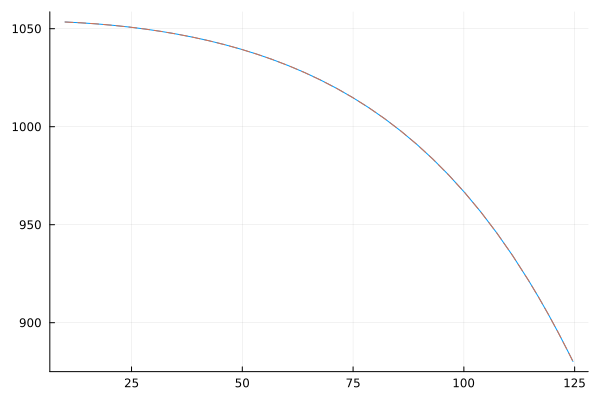

In [27]:
mu_test = mu_of_T.(T_unique)
plot(T_unique, mu_test, lw=1, label="")
plot!(T_unique, mu_unique, lw=1, linestyle=:dash, label="")



In [25]:
println(mu_of_T(122.0))
println(mu_of_T(123.0))
println(mu_of_T(124.0))

891.8874020812586
887.5000790544185
883.0648176589658


In [2]:
using Plots
using LaTeXStrings

In [ ]:
us = 0.0:0.01:2*pi
vs = 0.0:0.01:pi 

a1 = 30.0
c1 = 30.0

a2 = 19.0
c2 = 69.0

a3 = 15.0
c3 = 119.0

a4 = 13.0
c4 = 146.0



In [14]:
us = range(0, 2π; length=400)

a1, c1 = 30.0, 30.0
a2, c2 = 19.0, 69.0
a3, c3 = 15.0, 119.0
a4, c4 = 13.0, 146.0

x1 = a1 .* cos.(us); y1 = c1 .* sin.(us)
x2 = a2 .* cos.(us); y2 = c2 .* sin.(us)
x3 = a3 .* cos.(us); y3 = c3 .* sin.(us)
x4 = a4 .* cos.(us); y4 = c4 .* sin.(us)

plot(x1, y1; aspect_ratio=1, lw=2, label=L"e=0.0")
plot!(x2, y2; lw=2, label=L"e=0.3", linestyle=:dash)
plot!(x3, y3; lw=2, label=L"e=0.7", linestyle=:dot)
plot!(x4, y4; lw=2, label=L"e=1.0", linestyle=:dashdot)
plot!(xlabel="X", ylabel="Z",
    xlimits=(-250,250),
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("EllipsoidShapes.svg")

"d:\\CodeFile\\Julia\\PNJLs\\Test\\FV\\EllipsoidShapes.svg"

In [17]:
include("../../src/Finite_Vol/pnjl_FV.jl")
include("derv.jl")
using Plots 
using LaTeXStrings
using DataFrames, CSV
using QuadGK, LinearAlgebra
using Peaks 

In [3]:

function parametrize_deformation(R, δ;para=2.0,scale=1.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    para: 调节变形幅度的参数
    scale: +1 压扁 -1 拉长
    - δ = 0: 球形 (a=b=c=R)
    - δ > 0 (且 scale=1.0): 扁平椭球(a=b > c)
    - δ > 0 (且 scale=-1.0): 拉长椭球(a=b < c)
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(scale * 2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end


parametrize_deformation (generic function with 1 method)

In [50]:
rhos = 3.00:-0.01:0.01
X0 = [-1.8,-1.8, -2.2, 0.01, 0.01, 1200/hc]  # phi_u, phi_d, phi_s, Phi1, Phi2, muB

R = 20.0
e = 1.0
a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
modes = "D"
ints = get_nodes_el(800, a, b, c;modes=modes)
T = 5.0
data = zeros(length(rhos),7)
data[:,1] .=rhos
for (i, rhoB) in enumerate(rhos)
    X0 = Trho(T/hc, rhoB, X0, ints)

    data[i, 2:6] = X0[1:5]

    data[i, 7] = X0[6] * hc
end


a,b,c=9.050910136969893,9.050910136969893,97.65747273604649
 IR=0.16589653983590172


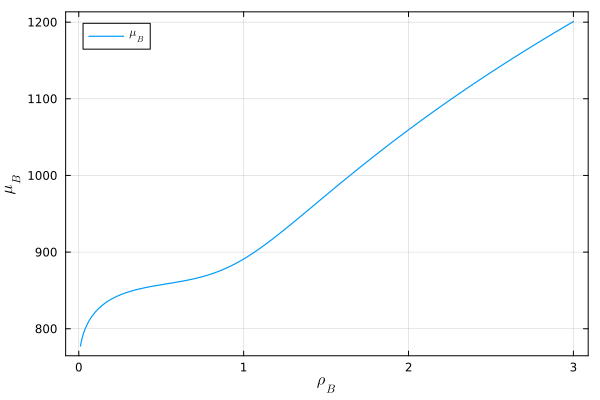

Maxima indices: Int64[]
Maxima values: Float64[]
Minima indices: Int64[]
Minima values: Float64[]


In [51]:
rhos = data[:,1]
mus = data[:,7]

inds_max, vals_max = findmaxima(mus)
inds_min, vals_min = findminima(mus)
println("Maxima indices: ", inds_max)
println("Maxima values: ", vals_max)
println("Minima indices: ", inds_min)
println("Minima values: ", vals_min)
p = plot(rhos, mus;
         lw=1.2, label=L"\mu_B",
         xlabel=L"\rho_B", ylabel=L"\mu_B",
         framestyle=:box, grid=true)

if !isempty(inds_max)
    scatter!(p, rhos[inds_max], vals_max; marker=:circle, ms=4, c=:red, label="maxima")

end

if !isempty(inds_min)
    scatter!(p, rhos[inds_min], vals_min; marker=:square, ms=4, c=:blue, label="minima")

end

display(p)

In [ ]:
Ts = 300.0:-2.0:50.0
X0 = [-0.01,-0.01, -0.40, 0.81,0.801]  
mu_B = 0.0

R = 30.0
e = 0.0
a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
modes = "D"
ints = get_nodes_el(200, a, b, c;modes=modes)

phius = similar(Ts)
Phi1s = similar(Ts)

for (i, T) in enumerate(Ts)
    X0 = Tmu(T/hc, mu_B/hc, X0, ints)
    phius[i] = X0[1]
    Phi1s[i] = X0[4]
end

a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736


In [ ]:
# 测试
Rs = 100.0:-1.0:15.0
delta = 0.0
IRs = similar(Rs)

for (i, R) in enumerate(Rs)
    a, b, c = parametrize_deformation(R, delta;para=3.0,scale=-1.0)
    IRs[i] = Find_IR_el(a, b, c; modes="D")
end

plot(Rs, IRs, xlabel=L"R", ylabel=L"\Lambda_{IR}", lw=2, label="")

In [ ]:
# 测试
Rs = 20.0
deltas = 0.0:0.05:1.0
IRs = similar(deltas)


for (i, delta) in enumerate(deltas)
    a, b, c = parametrize_deformation(Rs, delta;para=3.0,scale=-1.0)
    IRs[i] = Find_IR_el(a, b, c; modes="D")
end

plot(deltas, IRs, xlabel=L"\delta", ylabel=L"\Lambda_{IR}", lw=2, label="")

a,b,c=9.050910136969893,9.050910136969893,97.65747273604649
 IR=0.16589653983590172
e=1.0, T_max=[114.0]


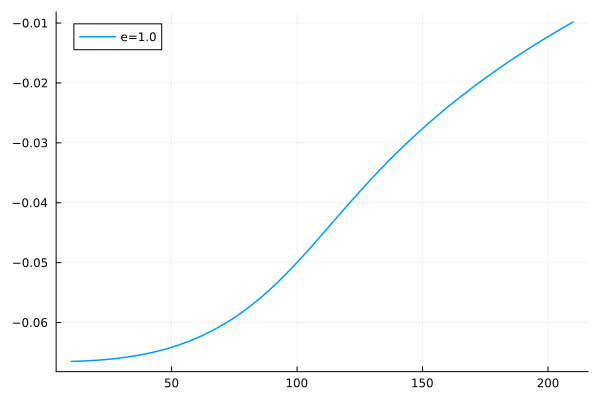

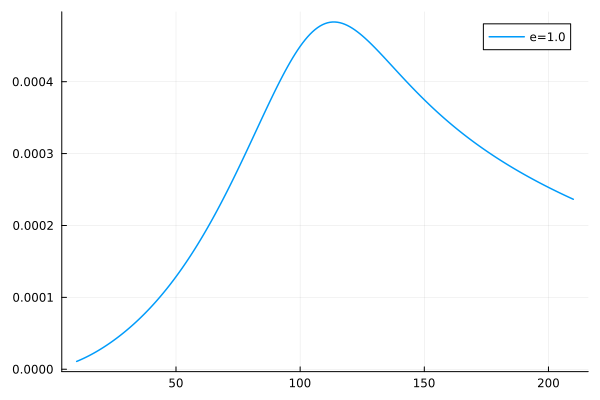

In [54]:
Ts = 210.0:-1.0:10.0

mu_B = 1200.0

R = 20.0
es = [1.0]
p1 = plot()
p3 = plot()
for e in es
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    modes = "D"
    ints = get_nodes_el(300, a, b, c;modes=modes)

    phius = similar(Ts)
    dphius = similar(Ts)
    X0 = [-0.01,-0.01, -0.40, 0.81,0.801]  
    for (i, T) in enumerate(Ts)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[i] = X0[1]
       
    end
    plot!(p1, Ts, phius, lw=1.5, label="e=$(e)")
    
    derivation!(phius, Ts, dphius)
    plot!(p3, Ts, dphius, lw=1.5, label="e=$(e)")
    inds_max, vals_max = findmaxima(dphius)
    println("e=$(e), T_max=$(Ts[inds_max])")
end
display(p1)
display(p3)

a,b,c=9.050910136969893,9.050910136969893,97.65747273604649
 IR=0.16589653983590172
e=1.0, muB_max=[39.0, 66.0, 99.0, 120.0, 138.0, 162.0, 174.0, 186.0, 207.0, 219.0, 234.0, 252.0, 857.5]


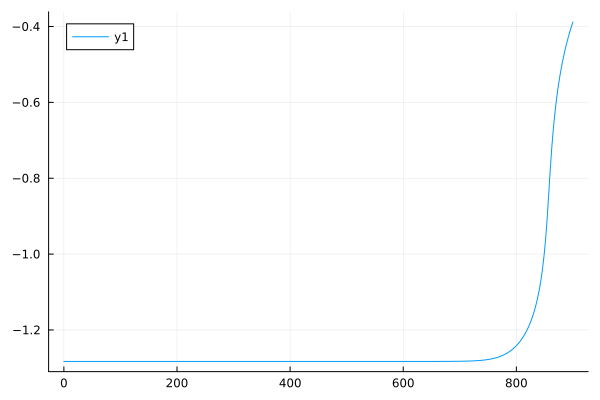

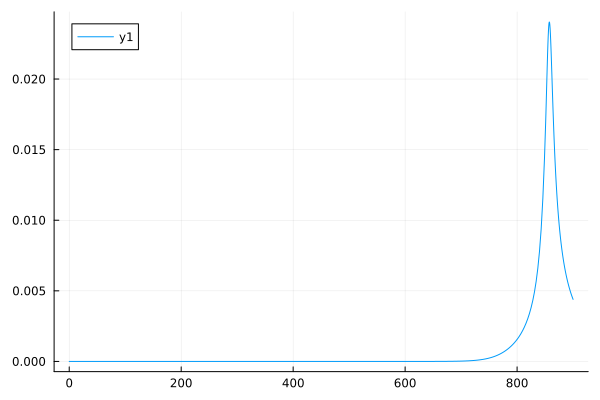

In [67]:
mu_Bs1 = 0.0:3.0:850.0
mu_Bs2 = 851.0:0.5:900.0
mu_Bs = vcat(mu_Bs1, mu_Bs2)

T = 20.0

R = 20.0
es = [1.0]
p1 = plot()
p2 = plot()
for e in es
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    modes = "D"
    ints = get_nodes_el(300, a, b, c;modes=modes)

    phius = similar(mu_Bs)  
    dphius = similar(mu_Bs)
    X0 = [-1.8,-1.8, -2.2, 0.11, 0.11]
    #X0 = [-0.01,-0.01, -0.40, 0.81,0.801]
    for (i, mu_B) in enumerate(mu_Bs)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[i] = X0[1]
    end
    derivation!(phius, mu_Bs, dphius)
    inds_max, vals_max = findmaxima(dphius)
    println("e=$(e), muB_max=$(mu_Bs[inds_max])")
    p1 = plot(mu_Bs, phius)
    p2 = plot(mu_Bs, dphius)
end
display(p1)
display(p2)


a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
a,b,c=19.73715118825253,19.73715118825253,69.3098291707641
 IR=0.07721472779646142
a,b,c=13.57636520545484,13.57636520545484,146.4862091040697
 IR=0.11059769513806485


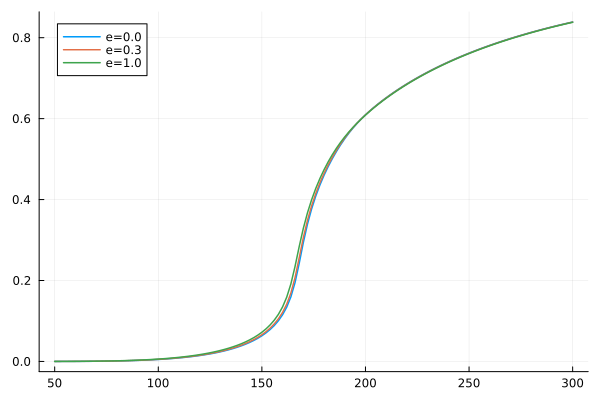

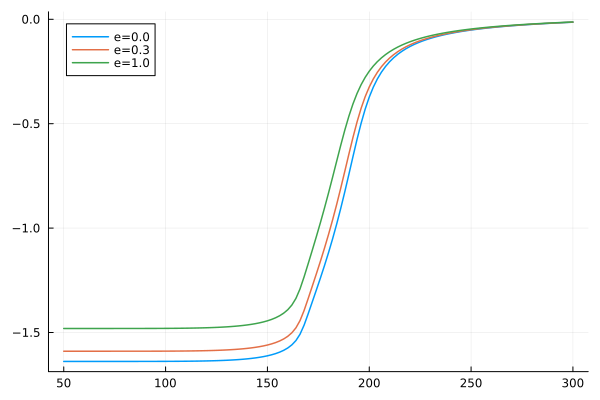

In [ ]:
Ts = 300.0:-2.0:50.0

mu_B = 0.0

R = 30.0
es = [0.0, 0.3, 1.0]
p1 = plot()
p2 = plot()
for e in es
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    modes = "D"
    ints = get_nodes_el(200, a, b, c;modes=modes)

    phius = similar(Ts)
    Phi1s = similar(Ts)
    X0 = [-0.01,-0.01, -0.40, 0.81,0.801]  
    for (i, T) in enumerate(Ts)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[i] = X0[1]
        Phi1s[i] = X0[4]
    end
    plot!(p2, Ts, phius, lw=1.5, label="e=$(e)")
    plot!(p1, Ts, Phi1s, lw=1.5, label="e=$(e)")

end
display(p1)
display(p2)